Populating the interactive namespace from numpy and matplotlib
['black', (0.0, 0.48999999999999999, 0.97999999999999998)]
1.0X-PBS_64s_stirred.npy
0.9
{}


/usr/lib/python3.4/site-packages/matplotlib/__init__.py:855: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


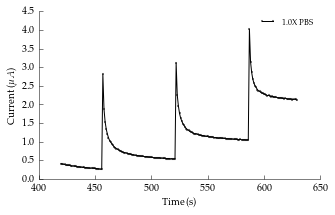

In [33]:
%pylab inline
sys.path.append('/home/mark/Dropbox/University/PhD/Workbench/')
import plot_formatting
import os, sys
plt.clf()
plot_formatting.format(style='thesis')

colours = plot_formatting.get_blues(2)
colours[0] = 'black'
print(colours)
start = 420
end = 630
traces = {}
files = [x for x in os.listdir('.') if x[-4:] == '.npy' and x.find('stirred') != -1 and x.find('_64s') != -1 and (x.find('1.0X') != -1)]
files.sort(reverse=True)
for i, file in enumerate(files):
    print(file)
    data = np.load(file)
    plt.plot(data['time'][start:end], list(map(lambda x: x * 1000000, data['current'][start:end])), label=file[:file.find('X')+1] + ' PBS', marker='d', mec=colours[i], color=colours[i], markersize=1)
    for line in data:
        if line['time'] > 550 and line['time'] < 552:
            print(line['voltage'])
print(traces)
plt.legend(loc=0, frameon=False)
plt.gca().set_xlabel('Time (s)')
plt.gca().set_ylabel('Current ($\mu A$)')
plt.savefig(filename='graph_64s_stirred.pdf',format='pdf')